In [1]:
from interpolML.model.orbit import Orbit
from interpolML.model.neural_prophet import NProphet
from orbit.utils.dataset import load_iclaims

In [2]:
orbit = Orbit(freq="W")

In [3]:
df = load_iclaims()
test_size = 100
train_df = df[:-test_size]
test_df = df[-test_size:]

In [4]:
train_df = train_df.rename(columns={"week" : "ds", "claims" : "y"})
test_df = test_df.rename(columns={"week" : "ds", "claims" : "y"})

In [5]:
orbit.fit(train_df)
predicted_df = orbit.predict(test_df)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


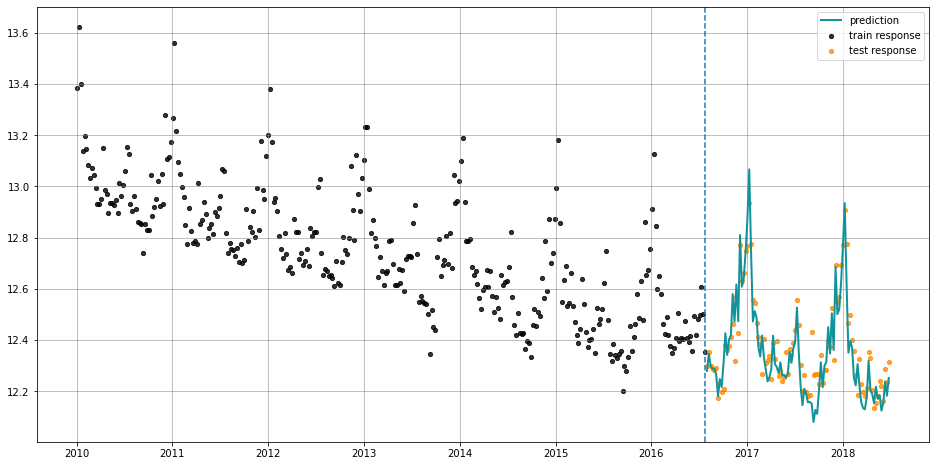

<AxesSubplot:>

In [6]:
from orbit.diagnostics.plot import plot_predicted_data
plot_predicted_data(
    training_actual_df=train_df, predicted_df=predicted_df,
    date_col=orbit.model.date_col, actual_col=orbit.model.response_col,
    test_actual_df=test_df, prediction_percentiles=[1, 100]
)

In [7]:
neural_prophet = NProphet(freq="W")

In [8]:
train_df = train_df[["ds", "y"]]

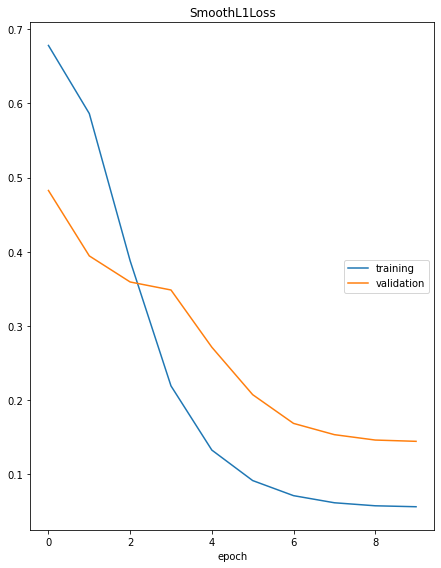

Epoch[10/10]: 100%|██████████| 10/10 [00:01<00:00,  6.08it/s, SmoothL1Loss=0.0565, MAE=0.258, RegLoss=0, MAE_val=0.491, SmoothL1Loss_val=0.145]


In [9]:
neural_prophet.fit(train_dataset=train_df)

In [11]:
neural_prophet.predict(test_df)

,ds,y,yhat1,residual1,trend,season_yearly
0,2016-07-31,None,13.013013,None,12.996382,0.016632
1,2016-08-07,None,12.931127,None,12.997619,-0.066492
2,2016-08-14,None,12.870945,None,12.998857,-0.127912
3,2016-08-21,None,12.831436,None,13.000094,-0.168658
4,2016-08-28,None,12.806163,None,13.001331,-0.195169
...,...,...,...,...,...,...
95,2018-05-27,None,12.976021,None,13.113949,-0.137928
96,2018-06-03,None,12.978136,None,13.115187,-0.137051
97,2018-06-10,None,13.046107,None,13.116425,-0.070317
98,2018-06-17,None,13.156119,None,13.117662,0.038458


In [13]:
predicted_df

,ds,prediction_5,prediction,prediction_95
0,2016-07-31,12.194395,12.279628,12.365481
1,2016-08-07,12.218249,12.346876,12.434529
2,2016-08-14,12.211098,12.298957,12.406684
3,2016-08-21,12.190317,12.287433,12.373990
4,2016-08-28,12.179283,12.288243,12.378969
...,...,...,...,...
95,2018-05-27,11.889904,12.124299,12.310718
96,2018-06-03,11.934159,12.154877,12.397653
97,2018-06-10,12.052986,12.238285,12.489115
98,2018-06-17,11.944775,12.183057,12.419062
